# PROJECT 2

## Table of contents
<a id='table_of_contents'></a>

0. [Import libraries](#import_libraries)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#Benchmark_model)
    5.1. [Train-test split](#Train-test_split)
    5.2. [Fit a model to the data](#Fit_a_model_to_the_data)
    5.3. [Model evaluation](#Model_evaluation)
7. [Feature engineering](#Feature_engineering)
8. [Model training](#Model_training)
    7.1. [Decision Tree](#Decision_tree)
    7.2. [KNN](#KNN)
    7.3. [Comparing algorithm performances](#Comparing_algorithm_performances)
9. [Tuning](#Tuning)


### 0.Import libraries  <a id='import_libraries'></a>



[Back_to_top](#table_of_contents)

In [27]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy
import sklearn

### 1.Import Data <a id='import_data'></a>
[Back_to_top](#table_of_contents)

In [28]:
hcc_data = pd.read_csv("hcc_dataset.csv")

In [29]:
pd.set_option('display.max_columns',None)

In [30]:
print(hcc_data.shape)
hcc_data.head()

(165, 50)


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives


### 2.Data exploration  <a id='data_exploration'></a>

[Back_to_top](#table_of_contents)

In [31]:
hcc_data.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [32]:
hcc_data.dtypes

Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI               object
HIV               object
NASH              object
Varices           object
Spleno            object
PHT               object
PVT               object
Metastasis        object
Hallmark          object
Age                int64
Grams_day         object
Packs_year        object
PS                object
Encephalopathy    object
Ascites           object
INR               object
AFP               object
Hemoglobin        object
MCV               object
Leucocytes        object
Platelets         object
 Albumin          object
Total_Bil         object
ALT               object
AST               object
GGT               object


In [33]:
numerical_columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']
for col in numerical_columns:
    # Verificar se a coluna é de tipo object, indicando possível presença de strings
    if hcc_data[col].dtype == 'object' :
        hcc_data[col]=pd.to_numeric(hcc_data[col].str.replace(' ', ''), errors='coerce')
    else:
        # Se não for object, converte diretamente
        hcc_data[col]=pd.to_numeric(hcc_data[col], errors='coerce')

In [34]:
hcc_data.dtypes

Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Varices            object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age                 int64
Grams_day         float64
Packs_year        float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
 Albumin          float64
Total_Bil         float64
ALT               float64
AST         

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': ' Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: 

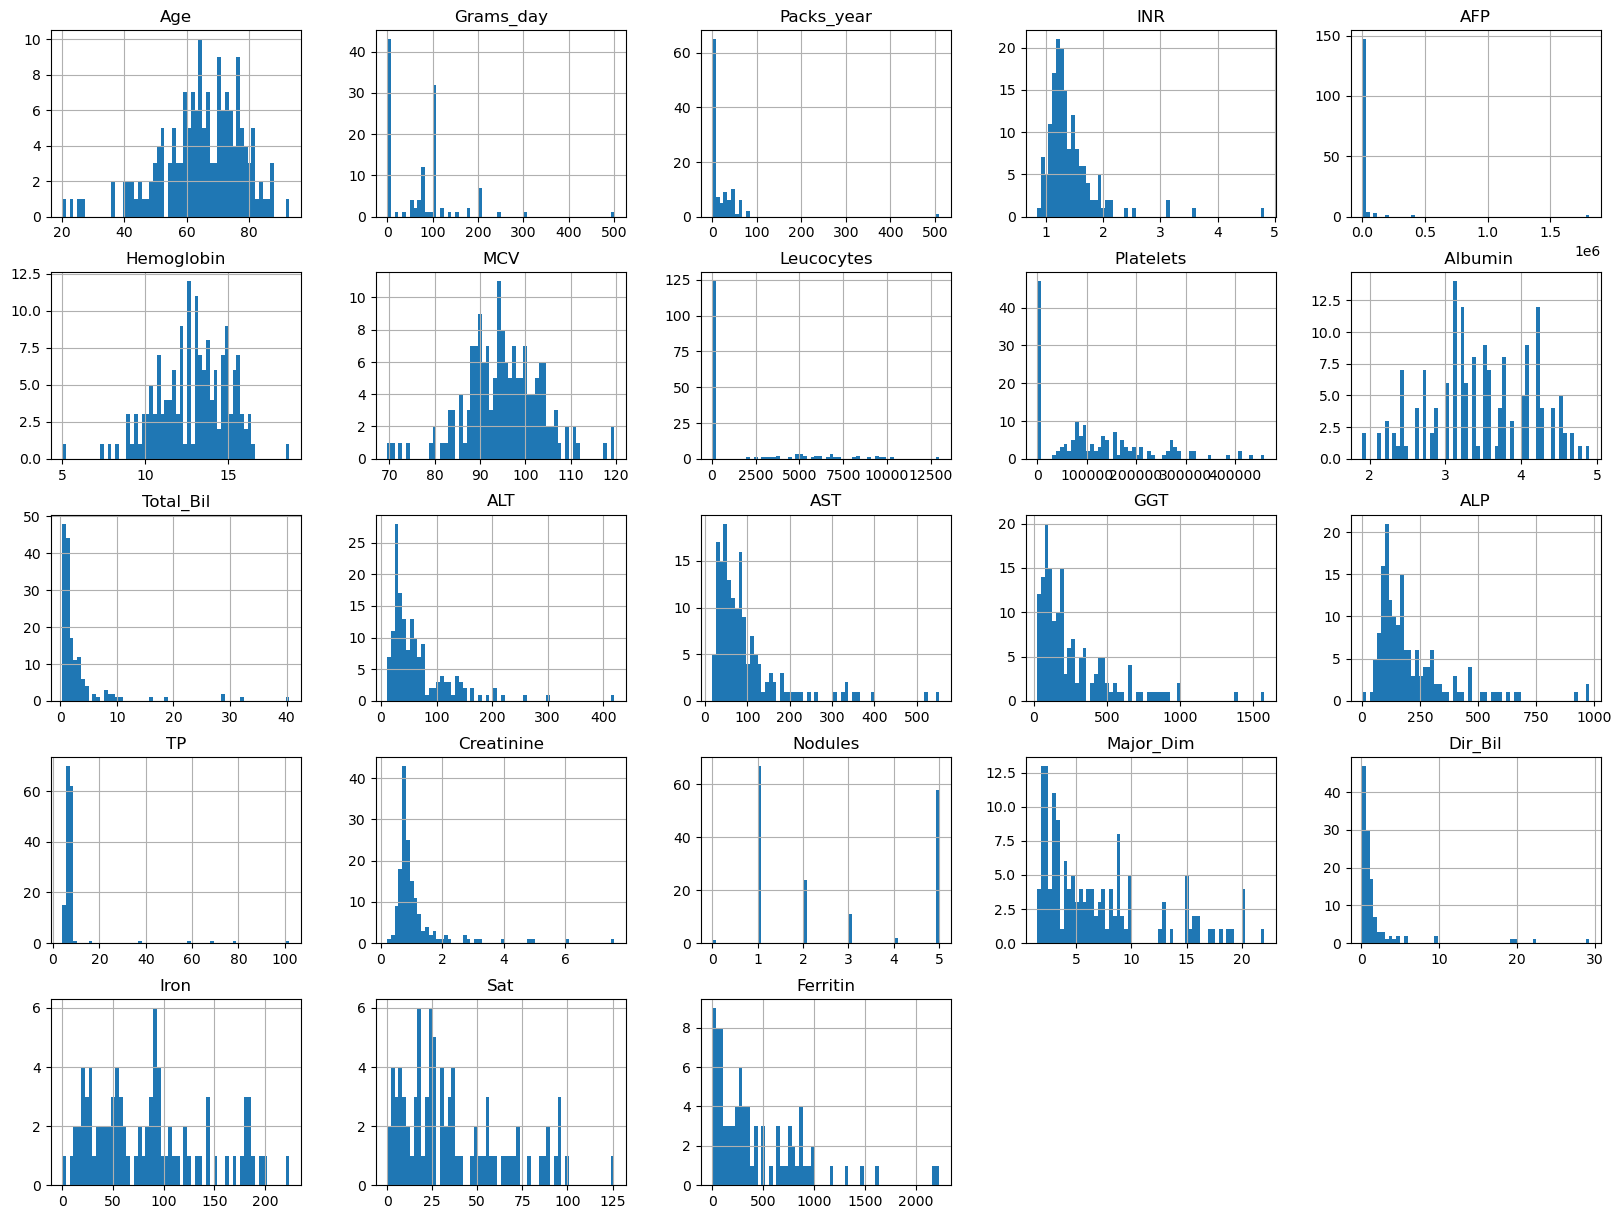

In [35]:
hcc_data.hist(figsize=(20,15),bins=60)

<Axes: xlabel='index', ylabel='Grams_day'>

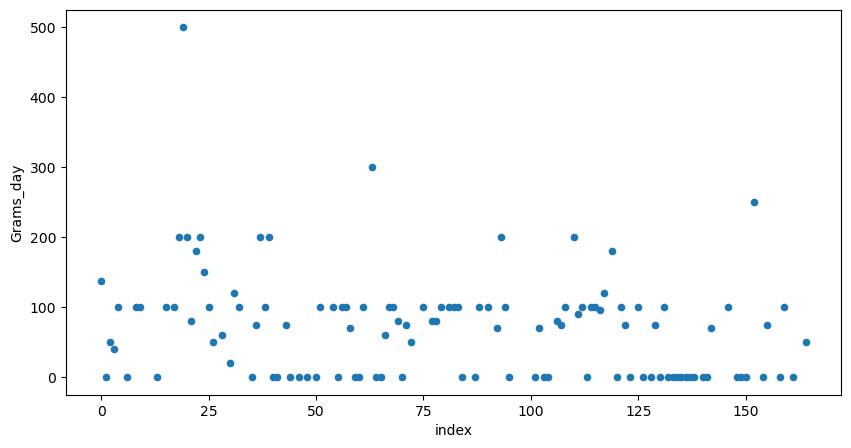

In [36]:
hcc_data.reset_index().plot(kind='scatter',y='Grams_day',x='index',figsize=(10,5))

<Axes: xlabel='Grams_day'>

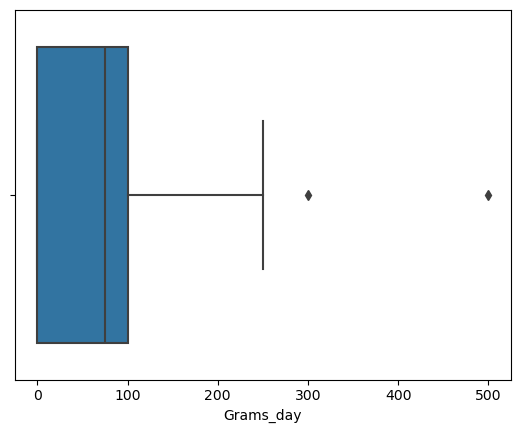

In [37]:
sns.boxplot(x=hcc_data['Grams_day'])

<Axes: xlabel='index', ylabel='Packs_year'>

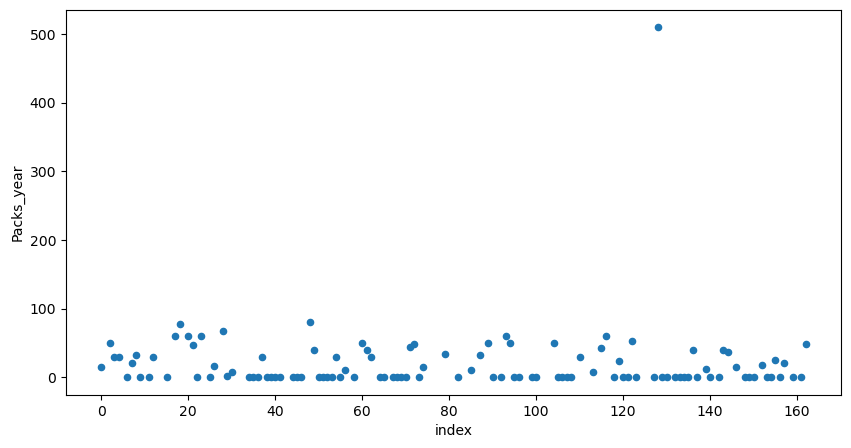

In [38]:
hcc_data.reset_index().plot(kind='scatter',y='Packs_year',x='index',figsize=(10,5))

In [39]:
hcc_data[hcc_data['Packs_year']>100].shape

(1, 50)

<Axes: xlabel='index', ylabel='INR'>

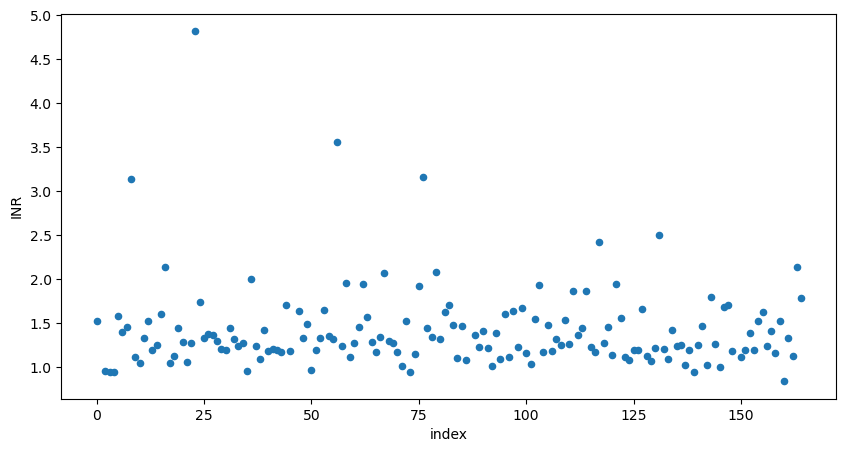

In [40]:
hcc_data.reset_index().plot(kind='scatter',y='INR',x='index',figsize=(10,5))

In [41]:
hcc_data[hcc_data['Packs_year']>2.5].shape

(49, 50)

<Axes: xlabel='index', ylabel='AFP'>

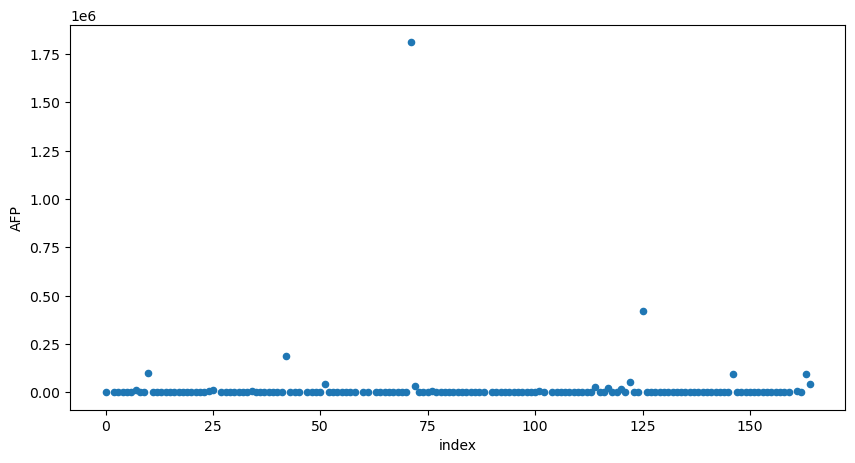

In [42]:
hcc_data.reset_index().plot(kind='scatter',y='AFP',x='index',figsize=(10,5))

In [43]:
hcc_data[hcc_data['Packs_year']>500].shape

(1, 50)

<Axes: xlabel='index', ylabel='Hemoglobin'>

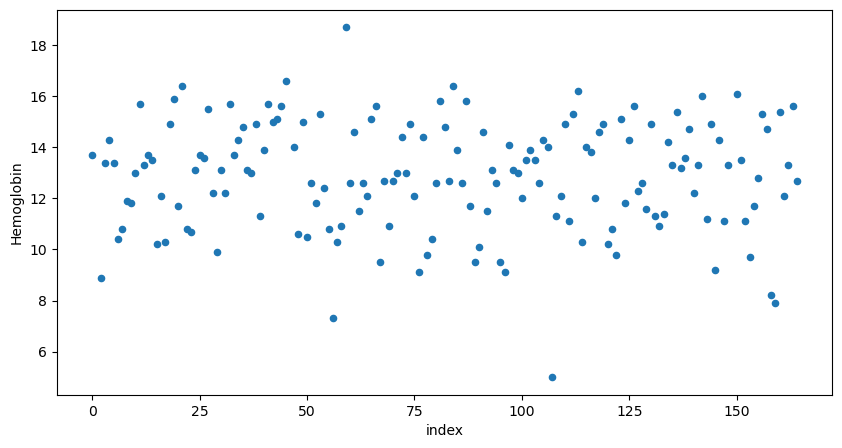

In [44]:
hcc_data.reset_index().plot(kind='scatter',y='Hemoglobin',x='index',figsize=(10,5))

In [45]:
hcc_data['Hemoglobin'].mean()

12.87901234567901

In [46]:
hcc_data[hcc_data['Hemoglobin']<10].shape

(15, 50)

In [47]:
hcc_data[hcc_data['Hemoglobin']>17.2].shape

(1, 50)

<Axes: xlabel='index', ylabel='MCV'>

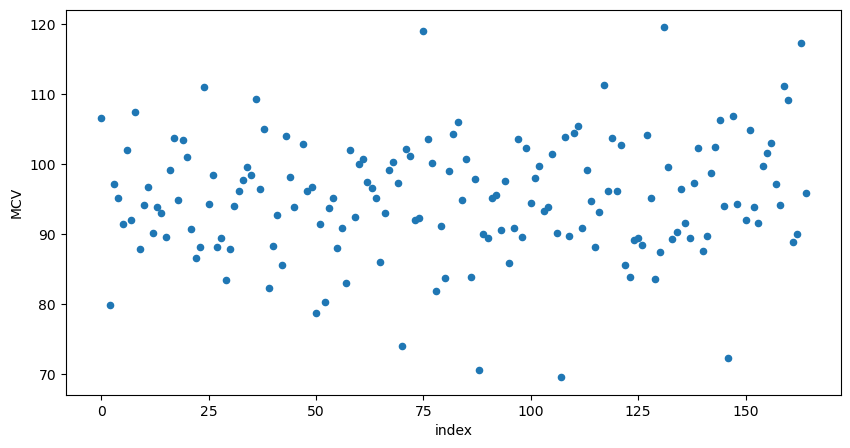

In [48]:
hcc_data.reset_index().plot(kind='scatter',y='MCV',x='index',figsize=(10,5))

In [49]:
hcc_data[hcc_data['MCV']>111].shape

(5, 50)

In [50]:
hcc_data[hcc_data['MCV']<71].shape

(2, 50)

<Axes: xlabel='index', ylabel='Leucocytes'>

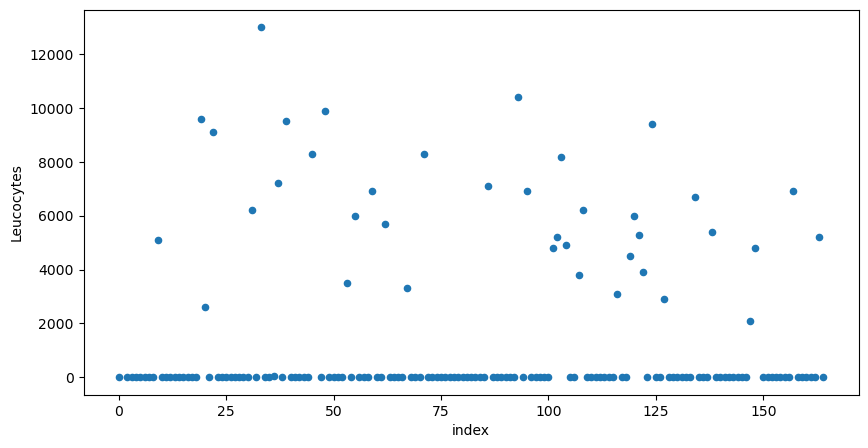

In [51]:
hcc_data.reset_index().plot(kind='scatter',y='Leucocytes',x='index',figsize=(10,5))

In [52]:
hcc_data[hcc_data['Leucocytes']>11000].shape

(1, 50)

In [53]:
hcc_data['Leucocytes'].describe()

count      162.000000
mean      1473.961549
std       2909.106006
min          2.200000
25%          5.100000
50%          7.200000
75%         19.525000
max      13000.000000
Name: Leucocytes, dtype: float64

In [54]:
hcc_data[hcc_data['Leucocytes']<200].shape

(124, 50)

<Axes: xlabel='index', ylabel='Platelets'>

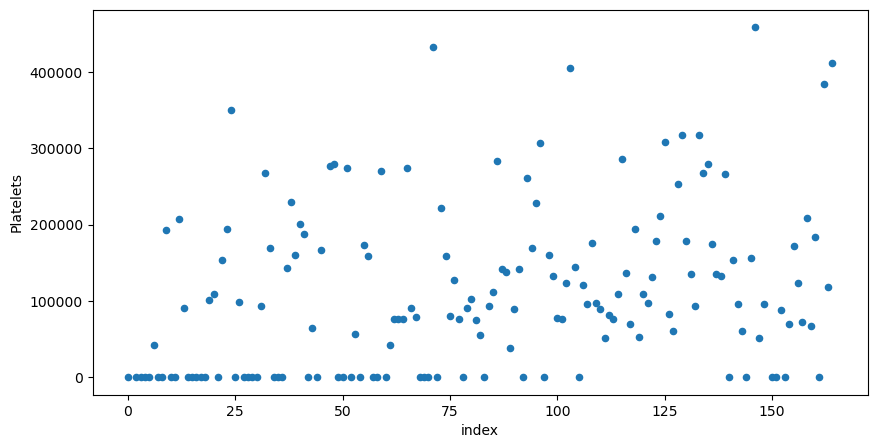

In [55]:
hcc_data.reset_index().plot(kind='scatter',y='Platelets',x='index',figsize=(10,5))

In [56]:
hcc_data['Platelets'].describe()

count       162.000000
mean     113206.442654
std      107118.632481
min           1.710000
25%         255.750000
50%       93000.000000
75%      171500.000000
max      459000.000000
Name: Platelets, dtype: float64

In [57]:
hcc_data[hcc_data['Platelets']<50000].shape

(50, 50)

<Axes: xlabel='index', ylabel=' Albumin'>

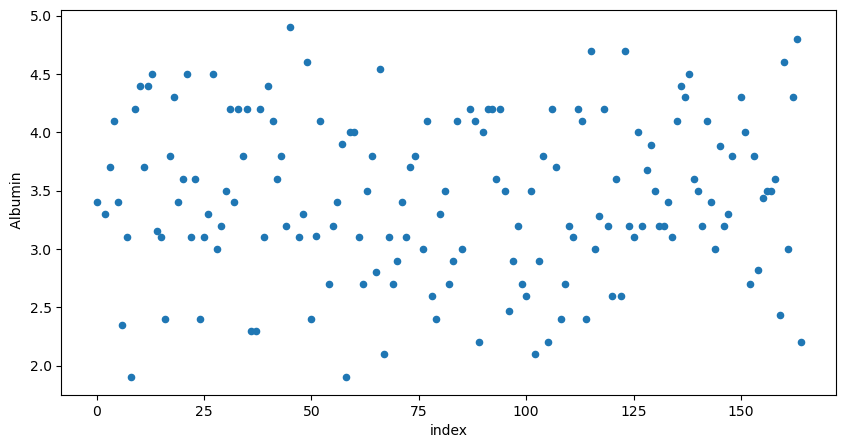

In [58]:
hcc_data.reset_index().plot(kind='scatter',y=' Albumin',x='index',figsize=(10,5))

In [59]:
hcc_data[hcc_data[' Albumin']<2.0].shape

(2, 50)

<Axes: xlabel='index', ylabel='Total_Bil'>

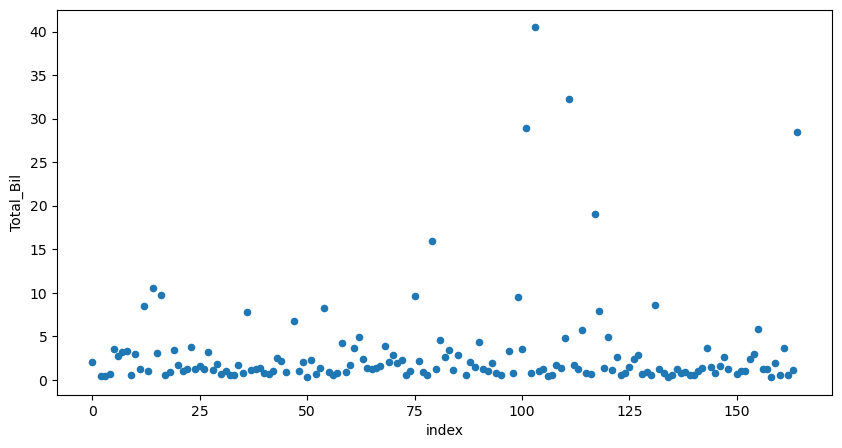

In [60]:
hcc_data.reset_index().plot(kind='scatter',y='Total_Bil',x='index',figsize=(10,5))

In [61]:
hcc_data[hcc_data['Total_Bil']>20].shape

(4, 50)

<Axes: xlabel='index', ylabel='ALT'>

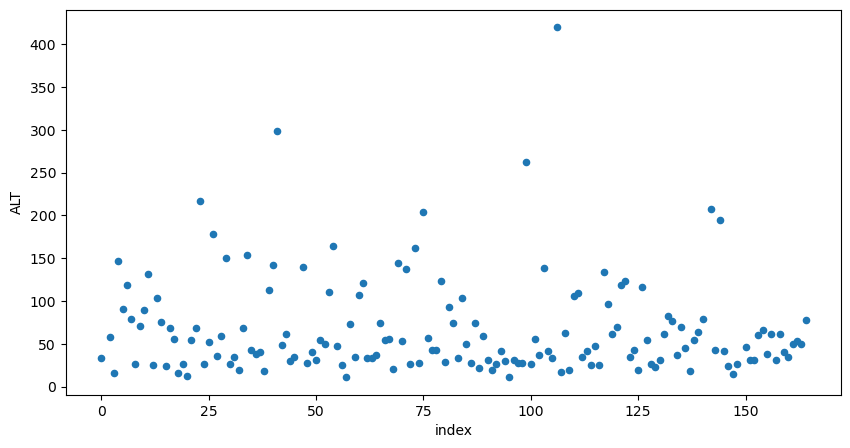

In [62]:
hcc_data.reset_index().plot(kind='scatter',y='ALT',x='index',figsize=(10,5))

In [63]:
hcc_data['ALT'].describe()

count    161.000000
mean      67.093168
std       57.539747
min       11.000000
25%       31.000000
50%       50.000000
75%       78.000000
max      420.000000
Name: ALT, dtype: float64

In [64]:
hcc_data[hcc_data['ALT']>300].shape

(1, 50)

<Axes: xlabel='index', ylabel='AST'>

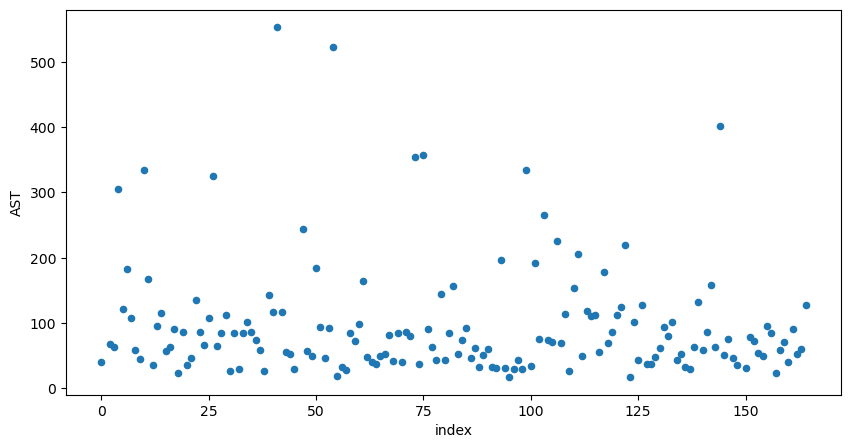

In [65]:
hcc_data.reset_index().plot(kind='scatter',y='AST',x='index',figsize=(10,5))

In [66]:
hcc_data['AST'].describe()

count    162.000000
mean      96.382716
std       87.484241
min       17.000000
25%       46.250000
50%       71.000000
75%      110.250000
max      553.000000
Name: AST, dtype: float64

In [67]:
hcc_data[hcc_data['AST']>400].shape

(3, 50)

In [68]:
hcc_data[hcc_data['AST']<25].shape

(5, 50)

<Axes: xlabel='index', ylabel='GGT'>

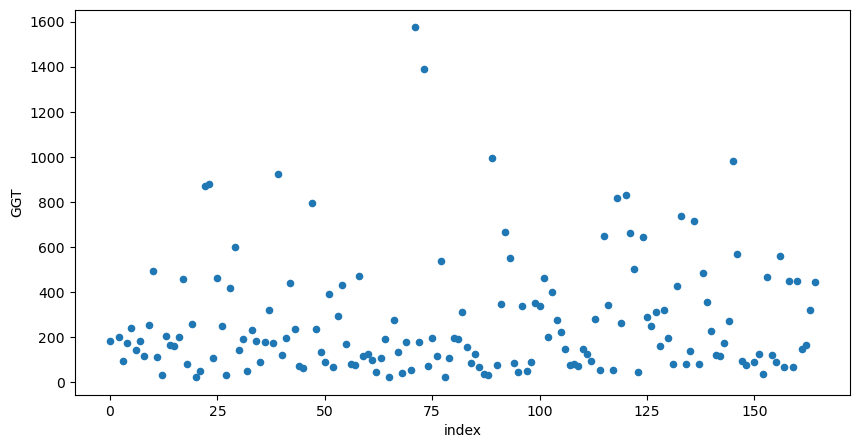

In [69]:
hcc_data.reset_index().plot(kind='scatter',y='GGT',x='index',figsize=(10,5))

In [70]:
hcc_data['GGT'].describe()

count     162.000000
mean      268.026543
std       258.750319
min        23.000000
25%        91.250000
50%       179.500000
75%       345.250000
max      1575.000000
Name: GGT, dtype: float64

In [71]:
hcc_data[hcc_data['GGT']>=1000].shape

(2, 50)

<Axes: xlabel='index', ylabel='ALP'>

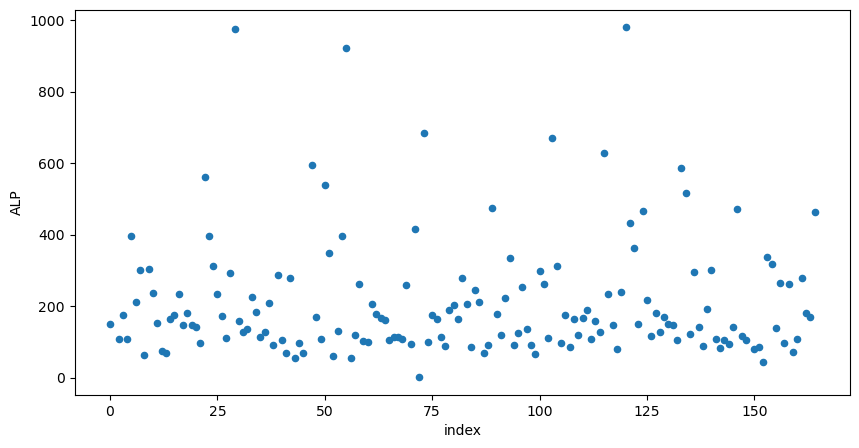

In [72]:
hcc_data.reset_index().plot(kind='scatter',y='ALP',x='index',figsize=(10,5))

In [73]:
hcc_data['ALP'].describe()

count    162.000000
mean     212.211605
std      167.943548
min        1.280000
25%      108.250000
50%      162.000000
75%      261.500000
max      980.000000
Name: ALP, dtype: float64

In [74]:
hcc_data[hcc_data['ALP']<30].shape

(1, 50)

In [75]:
hcc_data[hcc_data['ALP']>800].shape

(3, 50)

<Axes: xlabel='index', ylabel='Creatinine'>

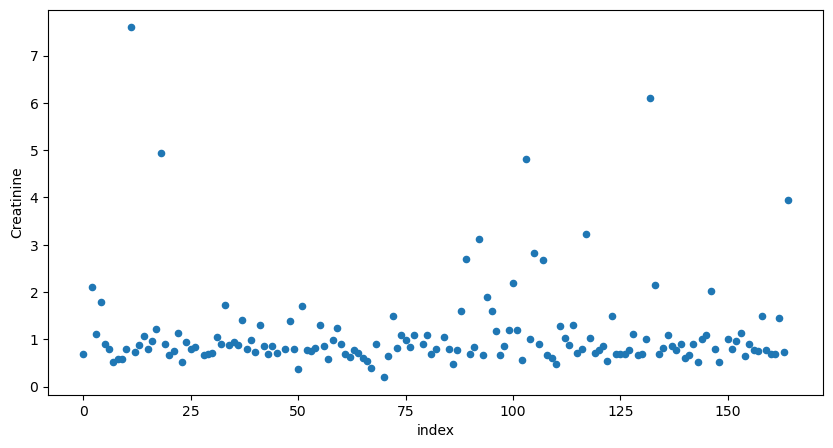

In [76]:
hcc_data.reset_index().plot(kind='scatter',y='Creatinine',x='index',figsize=(10,5))

In [77]:
hcc_data['Creatinine'].describe()

count    158.000000
mean       1.127089
std        0.955856
min        0.200000
25%        0.700000
50%        0.850000
75%        1.100000
max        7.600000
Name: Creatinine, dtype: float64

In [78]:
hcc_data[hcc_data['Creatinine']>4].shape

(4, 50)

<Axes: xlabel='index', ylabel='TP'>

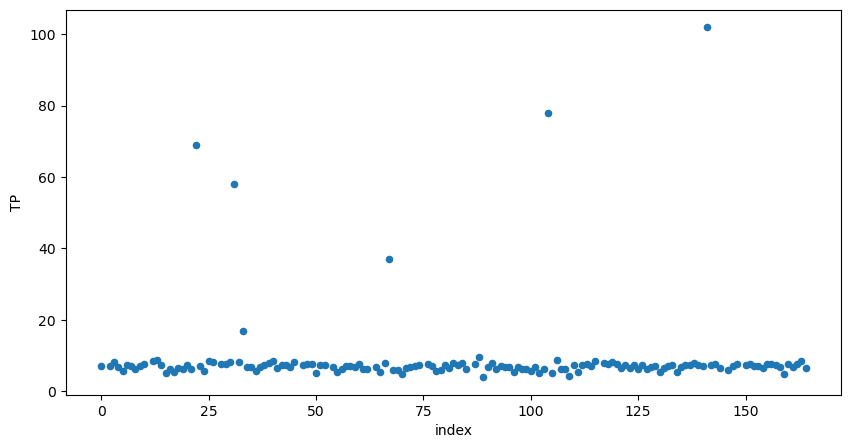

In [79]:
hcc_data.reset_index().plot(kind='scatter',y='TP',x='index',figsize=(10,5))

In [80]:
hcc_data['TP'].describe()

count    154.000000
mean       8.961039
std       11.728739
min        3.900000
25%        6.300000
50%        7.050000
75%        7.575000
max      102.000000
Name: TP, dtype: float64

In [81]:
hcc_data[hcc_data['TP']>11].shape

(6, 50)

<Axes: xlabel='index', ylabel='Major_Dim'>

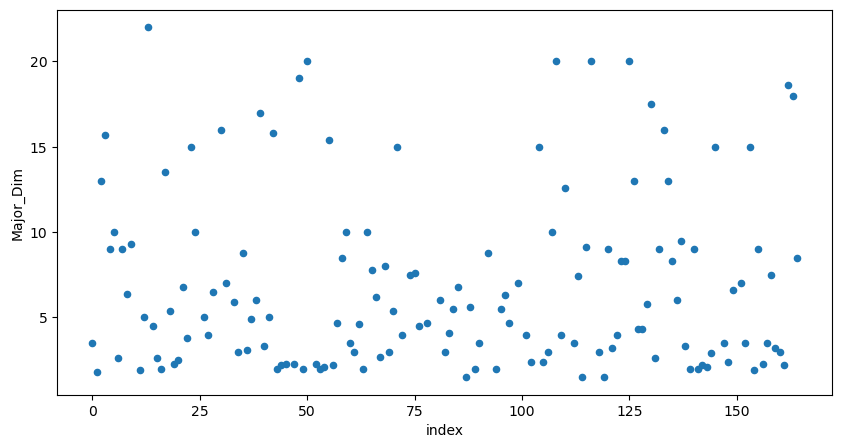

In [82]:
hcc_data.reset_index().plot(kind='scatter',y='Major_Dim',x='index',figsize=(10,5))

In [83]:
hcc_data[hcc_data['Major_Dim']>20].shape

(1, 50)

<Axes: xlabel='index', ylabel='Dir_Bil'>

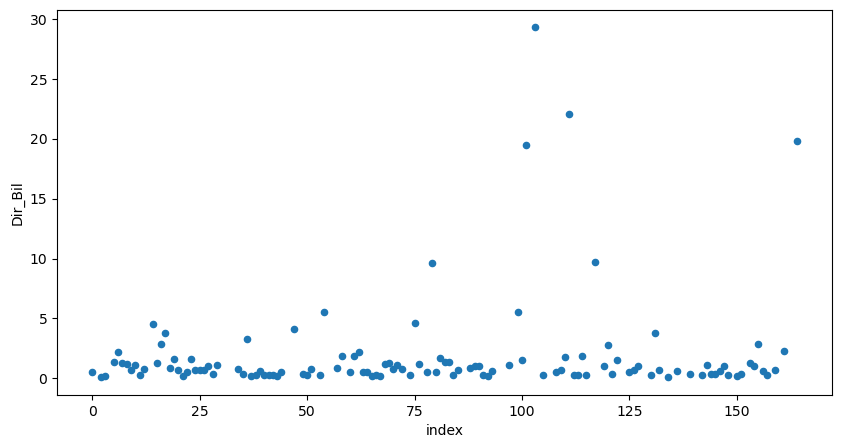

In [84]:
hcc_data.reset_index().plot(kind='scatter',y='Dir_Bil',x='index',figsize=(10,5))

In [85]:
hcc_data[hcc_data['Dir_Bil']>7].shape

(6, 50)

<Axes: xlabel='index', ylabel='Iron'>

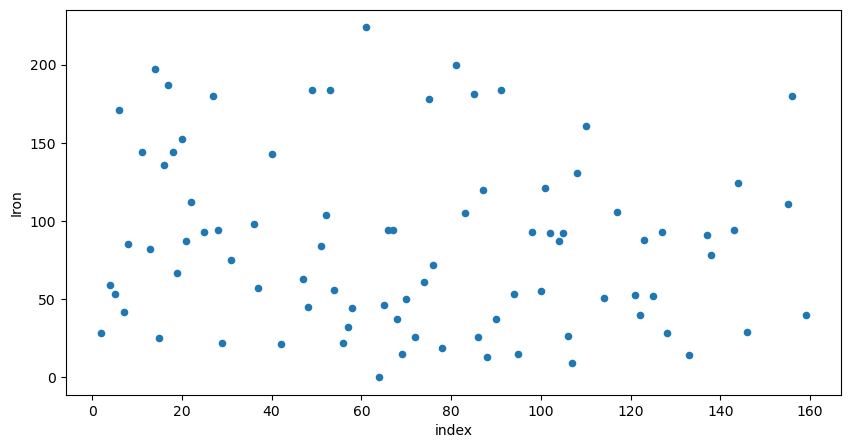

In [86]:
hcc_data.reset_index().plot(kind='scatter',y='Iron',x='index',figsize=(10,5))

In [87]:
hcc_data[hcc_data['Iron']<10].shape

(2, 50)

In [88]:
hcc_data[hcc_data['Iron']>200].shape

(1, 50)

<Axes: xlabel='index', ylabel='Sat'>

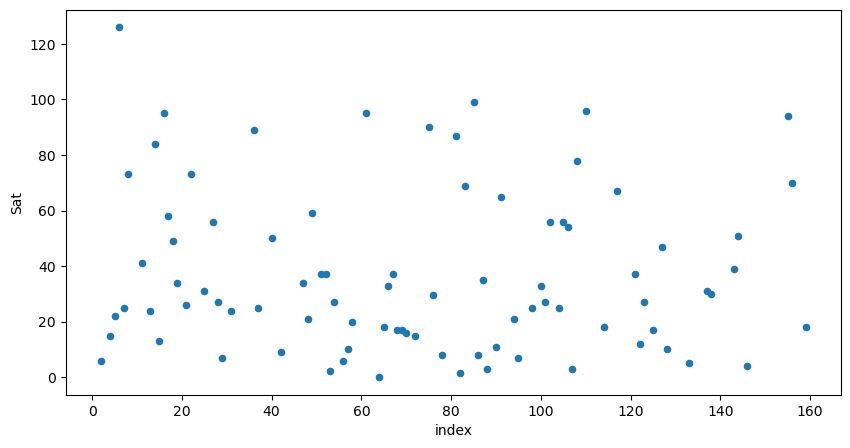

In [89]:
hcc_data.reset_index().plot(kind='scatter',y='Sat',x='index',figsize=(10,5))

In [90]:
hcc_data[hcc_data['Sat']>90].shape

(6, 50)

<Axes: xlabel='index', ylabel='Ferritin'>

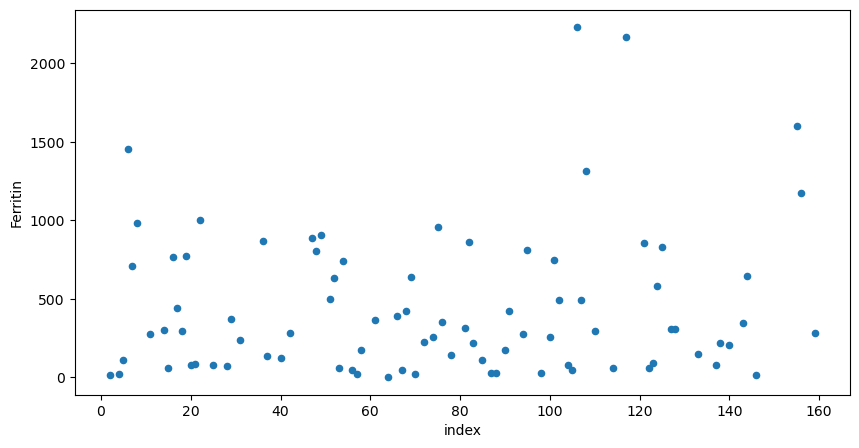

In [91]:
hcc_data.reset_index().plot(kind='scatter',y='Ferritin',x='index',figsize=(10,5))

In [92]:
hcc_data['Ferritin'].describe()

count      85.000000
mean      438.997647
std       457.114454
min         0.000000
25%        84.000000
50%       295.000000
75%       706.000000
max      2230.000000
Name: Ferritin, dtype: float64

In [93]:
hcc_data[hcc_data['Ferritin']>1000].shape

(7, 50)

### 3.Data cleaning  <a id='data_cleaning'></a>

[Back_to_top](#table_of_contents)

In [94]:
median_value = hcc_data[hcc_data['Grams_day'] <300]['Grams_day'].median()
hcc_data.loc[hcc_data['Grams_day'] >= 300, 'Grams_day'] = median_value

In [95]:
median_value = hcc_data[hcc_data['Packs_year'] < 100]['Packs_year'].median()
hcc_data.loc[hcc_data['Packs_year'] >= 100, 'Packs_year'] = median_value

In [96]:
median_value = hcc_data[hcc_data['INR'] < 2.5]['INR'].median()
hcc_data.loc[hcc_data['INR'] >= 2.5, 'INR'] = median_value

In [97]:
median_value = hcc_data[hcc_data['AFP'] < 125000]['AFP'].median()
hcc_data.loc[hcc_data['AFP'] >= 125000, 'AFP'] = median_value

<Axes: >

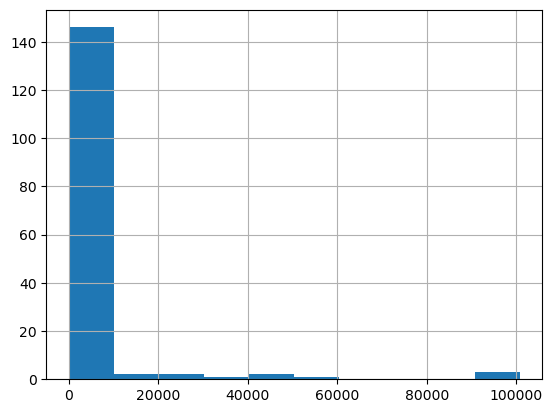

In [98]:
hcc_data['AFP'].hist()

In [99]:
median_value = hcc_data[hcc_data['Hemoglobin'] > 6]['Hemoglobin'].median()
hcc_data.loc[hcc_data['Hemoglobin'] <= 6, 'Hemoglobin'] = median_value

In [100]:
median_value = hcc_data[(hcc_data['MCV'] > 71) & (hcc_data['MCV'] < 111)]['MCV'].median()
hcc_data.loc[(hcc_data['MCV'] <= 71 )|(hcc_data['MCV'] >=111 ), 'MCV'] = median_value

In [101]:
median_value = hcc_data[hcc_data['Total_Bil'] < 20]['Total_Bil'].median()
hcc_data.loc[hcc_data['Total_Bil'] >= 20, 'Total_Bil'] = median_value

In [102]:
median_value = hcc_data[hcc_data['AST'] < 500]['AST'].median()
hcc_data.loc[hcc_data['AST'] >= 500, 'AST'] = median_value

In [103]:
median_value = hcc_data[hcc_data['GGT'] < 1000]['GGT'].median()
hcc_data.loc[hcc_data['GGT'] >= 1000, 'GGT'] = median_value

In [104]:
median_value = hcc_data[(hcc_data['ALP'] > 30) & (hcc_data['ALP'] < 800)]['ALP'].median()
hcc_data.loc[(hcc_data['ALP'] <= 30 )|(hcc_data['ALP'] >=800 ), 'ALP'] = median_value

In [105]:
median_value = hcc_data[hcc_data['Creatinine'] < 4]['Creatinine'].median()
hcc_data.loc[hcc_data['Creatinine'] >= 4, 'Creatinine'] = median_value

In [106]:
median_value = hcc_data[hcc_data['TP'] < 20]['TP'].median()
hcc_data.loc[hcc_data['TP'] >= 20, 'TP'] = median_value

In [107]:
median_value = hcc_data[hcc_data['Major_Dim'] < 20]['Major_Dim'].median()
hcc_data.loc[hcc_data['Major_Dim'] >= 20, 'Major_Dim'] = median_value

In [108]:
median_value = hcc_data[hcc_data['Dir_Bil'] < 18]['Dir_Bil'].median()
hcc_data.loc[hcc_data['Dir_Bil'] >= 18, 'Dir_Bil'] = median_value

In [109]:
median_value = hcc_data[(hcc_data['Iron'] > 10) & (hcc_data['Iron'] < 200)]['Iron'].median()
hcc_data.loc[(hcc_data['Iron'] <= 10 )|(hcc_data['Iron'] >=200 ), 'Iron'] = median_value

In [110]:
median_value = hcc_data[(hcc_data['Ferritin'] > 10) & (hcc_data['Ferritin'] < 1250)]['Ferritin'].median()
hcc_data.loc[(hcc_data['Ferritin'] <= 10 )|(hcc_data['Ferritin'] >=1250 ), 'Ferritin'] = median_value

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': ' Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: 

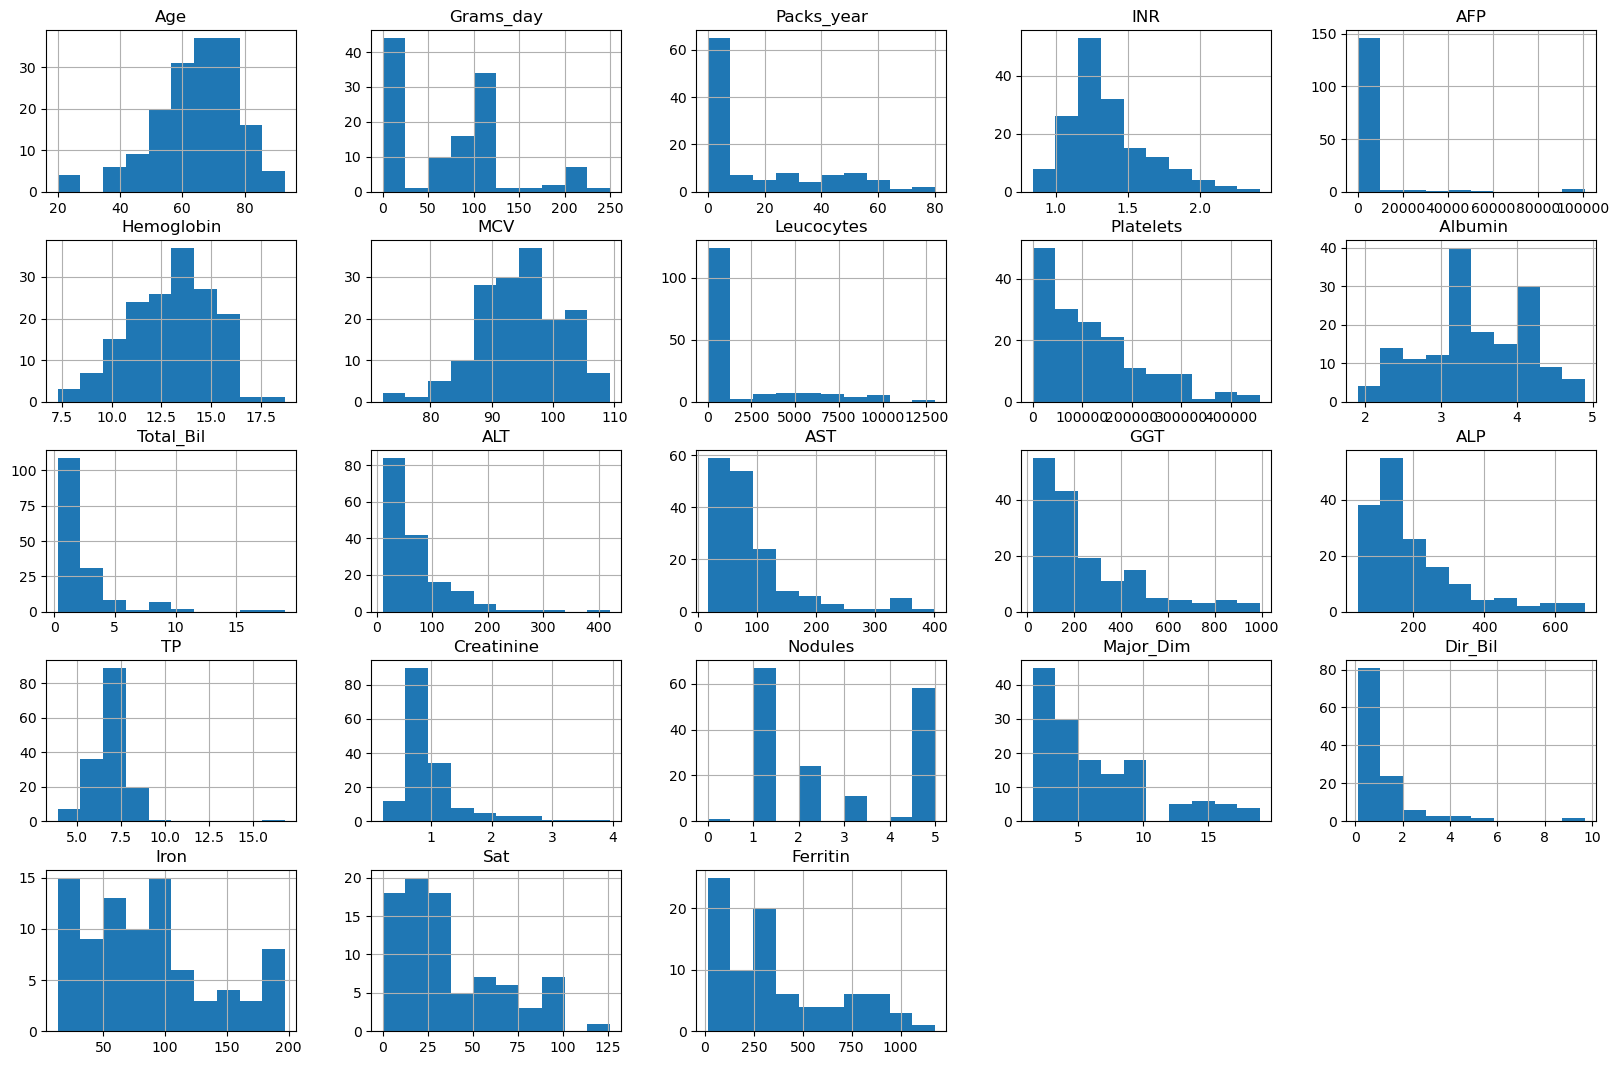

In [111]:
hcc_data.hist(figsize=(20,13))

In [112]:
hcc_data.replace('?', np.nan, inplace=True)

In [113]:
mask = ((hcc_data['Class'] == 'Lives') | (hcc_data['Class'] == 'Dies'))
hcc_data.loc[mask,'Encephalopathy'] = hcc_data.loc[mask,'Encephalopathy'].fillna('Not Applicable')
hcc_data.loc[mask,'Ascites'] = hcc_data.loc[mask,'Ascites'].fillna('Not Applicable')

In [114]:
hcc_data.isna().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     0
Ascites            0
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [115]:
def impute_missing_data(data):
    for column in data.columns:
        if data[column].dtype == 'object':  # Para dados categóricos
            # Preencher com a moda
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value,inplace=True)
        else:  # Para dados numéricos
            # Preencher com a mediana
            median_value = data[column].median()
            data[column].fillna(median_value,inplace=True)

# Aplicar a função ao dataset
impute_missing_data(hcc_data)


In [116]:
hcc_data.isna().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


### 4.Data preparation <a id='data_preparation'></a>

[Back_to_top](#table_of_contents)

In [117]:
data = hcc_data.copy() #deep copy

In [118]:
numerical_columns = ['Age','AFP', 'Hemoglobin', 'MCV','Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
                    ' Albumin','ALT','AST','GGT','ALP','Total_Bil','INR']
categorical_columns = ['Gender','Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
                    'Cirrhosis','Smoking', 'Diabetes', 'Obesity','PVT','Class']
all_needed_columns = categorical_columns + numerical_columns

In [119]:
main_data = data[all_needed_columns]
print(main_data.shape)
main_data.head()

(165, 27)


,Gender,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Smoking,Diabetes,Obesity,PVT,Class,Age,AFP,Hemoglobin,MCV,Nodules,Major_Dim,Dir_Bil,Iron,Albumin,ALT,AST,GGT,ALP,Total_Bil,INR
0,Male,Yes,No,No,No,No,Yes,Yes,Yes,No,No,Lives,67,95.0,13.7,106.60,1.0,3.5,0.5,83.0,3.4,34.0,41.0,183.0,150.0,2.1,1.530
1,Female,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Lives,62,30.5,13.1,94.75,1.0,1.8,0.7,83.0,3.4,50.0,70.0,178.0,159.5,1.3,1.285
2,Male,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Lives,78,5.8,8.9,79.80,5.0,13.0,0.1,28.0,3.3,58.0,68.0,202.0,109.0,0.4,0.960
3,Male,Yes,No,No,No,No,Yes,Yes,Yes,No,No,Dies,77,2440.0,13.4,97.10,2.0,15.7,0.2,83.0,3.7,16.0,64.0,94.0,174.0,0.4,0.950
4,Male,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Lives,76,49.0,14.3,95.10,1.0,9.0,0.7,59.0,4.1,147.0,306.0,173.0,109.0,0.7,0.940


### 5. Benchmark model <a id='Benchmark_model'></a>

[Back_to_top](#table_of_contents)

In [120]:
data_benchmark = hcc_data.copy()

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X = data_benchmark.drop(['Class'],axis=1)
y = data_benchmark['Class']

In [123]:
#onde-hote encode
X = pd.get_dummies(X)

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [125]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [126]:
#Model Evaluation

In [127]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        Dies       0.64      0.64      0.64        11
       Lives       0.82      0.82      0.82        22

    accuracy                           0.76        33
   macro avg       0.73      0.73      0.73        33
weighted avg       0.76      0.76      0.76        33

Accuracy: 0.7575757575757576


In [128]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred2 = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred2)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Accuracy on test set: {:.2f}".format(accuracy))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score: 0.68
Accuracy on test set: 0.79


In [129]:
train_data = X_train.join(y_train)

In [130]:
train_data.Class = pd.Categorical(train_data.Class,['Dies','Lives'],ordered=True)
train_data.Class = train_data.Class.cat.codes

In [131]:
###OUTRO BENCHMARK MODEL

In [132]:
train_data2 = train_data.copy()

In [133]:
from sklearn.linear_model import LinearRegression
X_train_a,y_train_a = train_data2.drop(['Class'],axis=1),train_data2['Class']
reg = LinearRegression()
reg.fit(X_train_a,y_train_a)

LinearRegression()

In [134]:
X_test_a,y_test_a = train_data2.drop(['Class'],axis=1),train_data2['Class']

In [135]:
reg.score(X_test_a,y_test_a)

0.6185899748732298

### 6. Feature engineering <a id='Feature_engineering'></a>

[Back_to_top](#table_of_contents)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

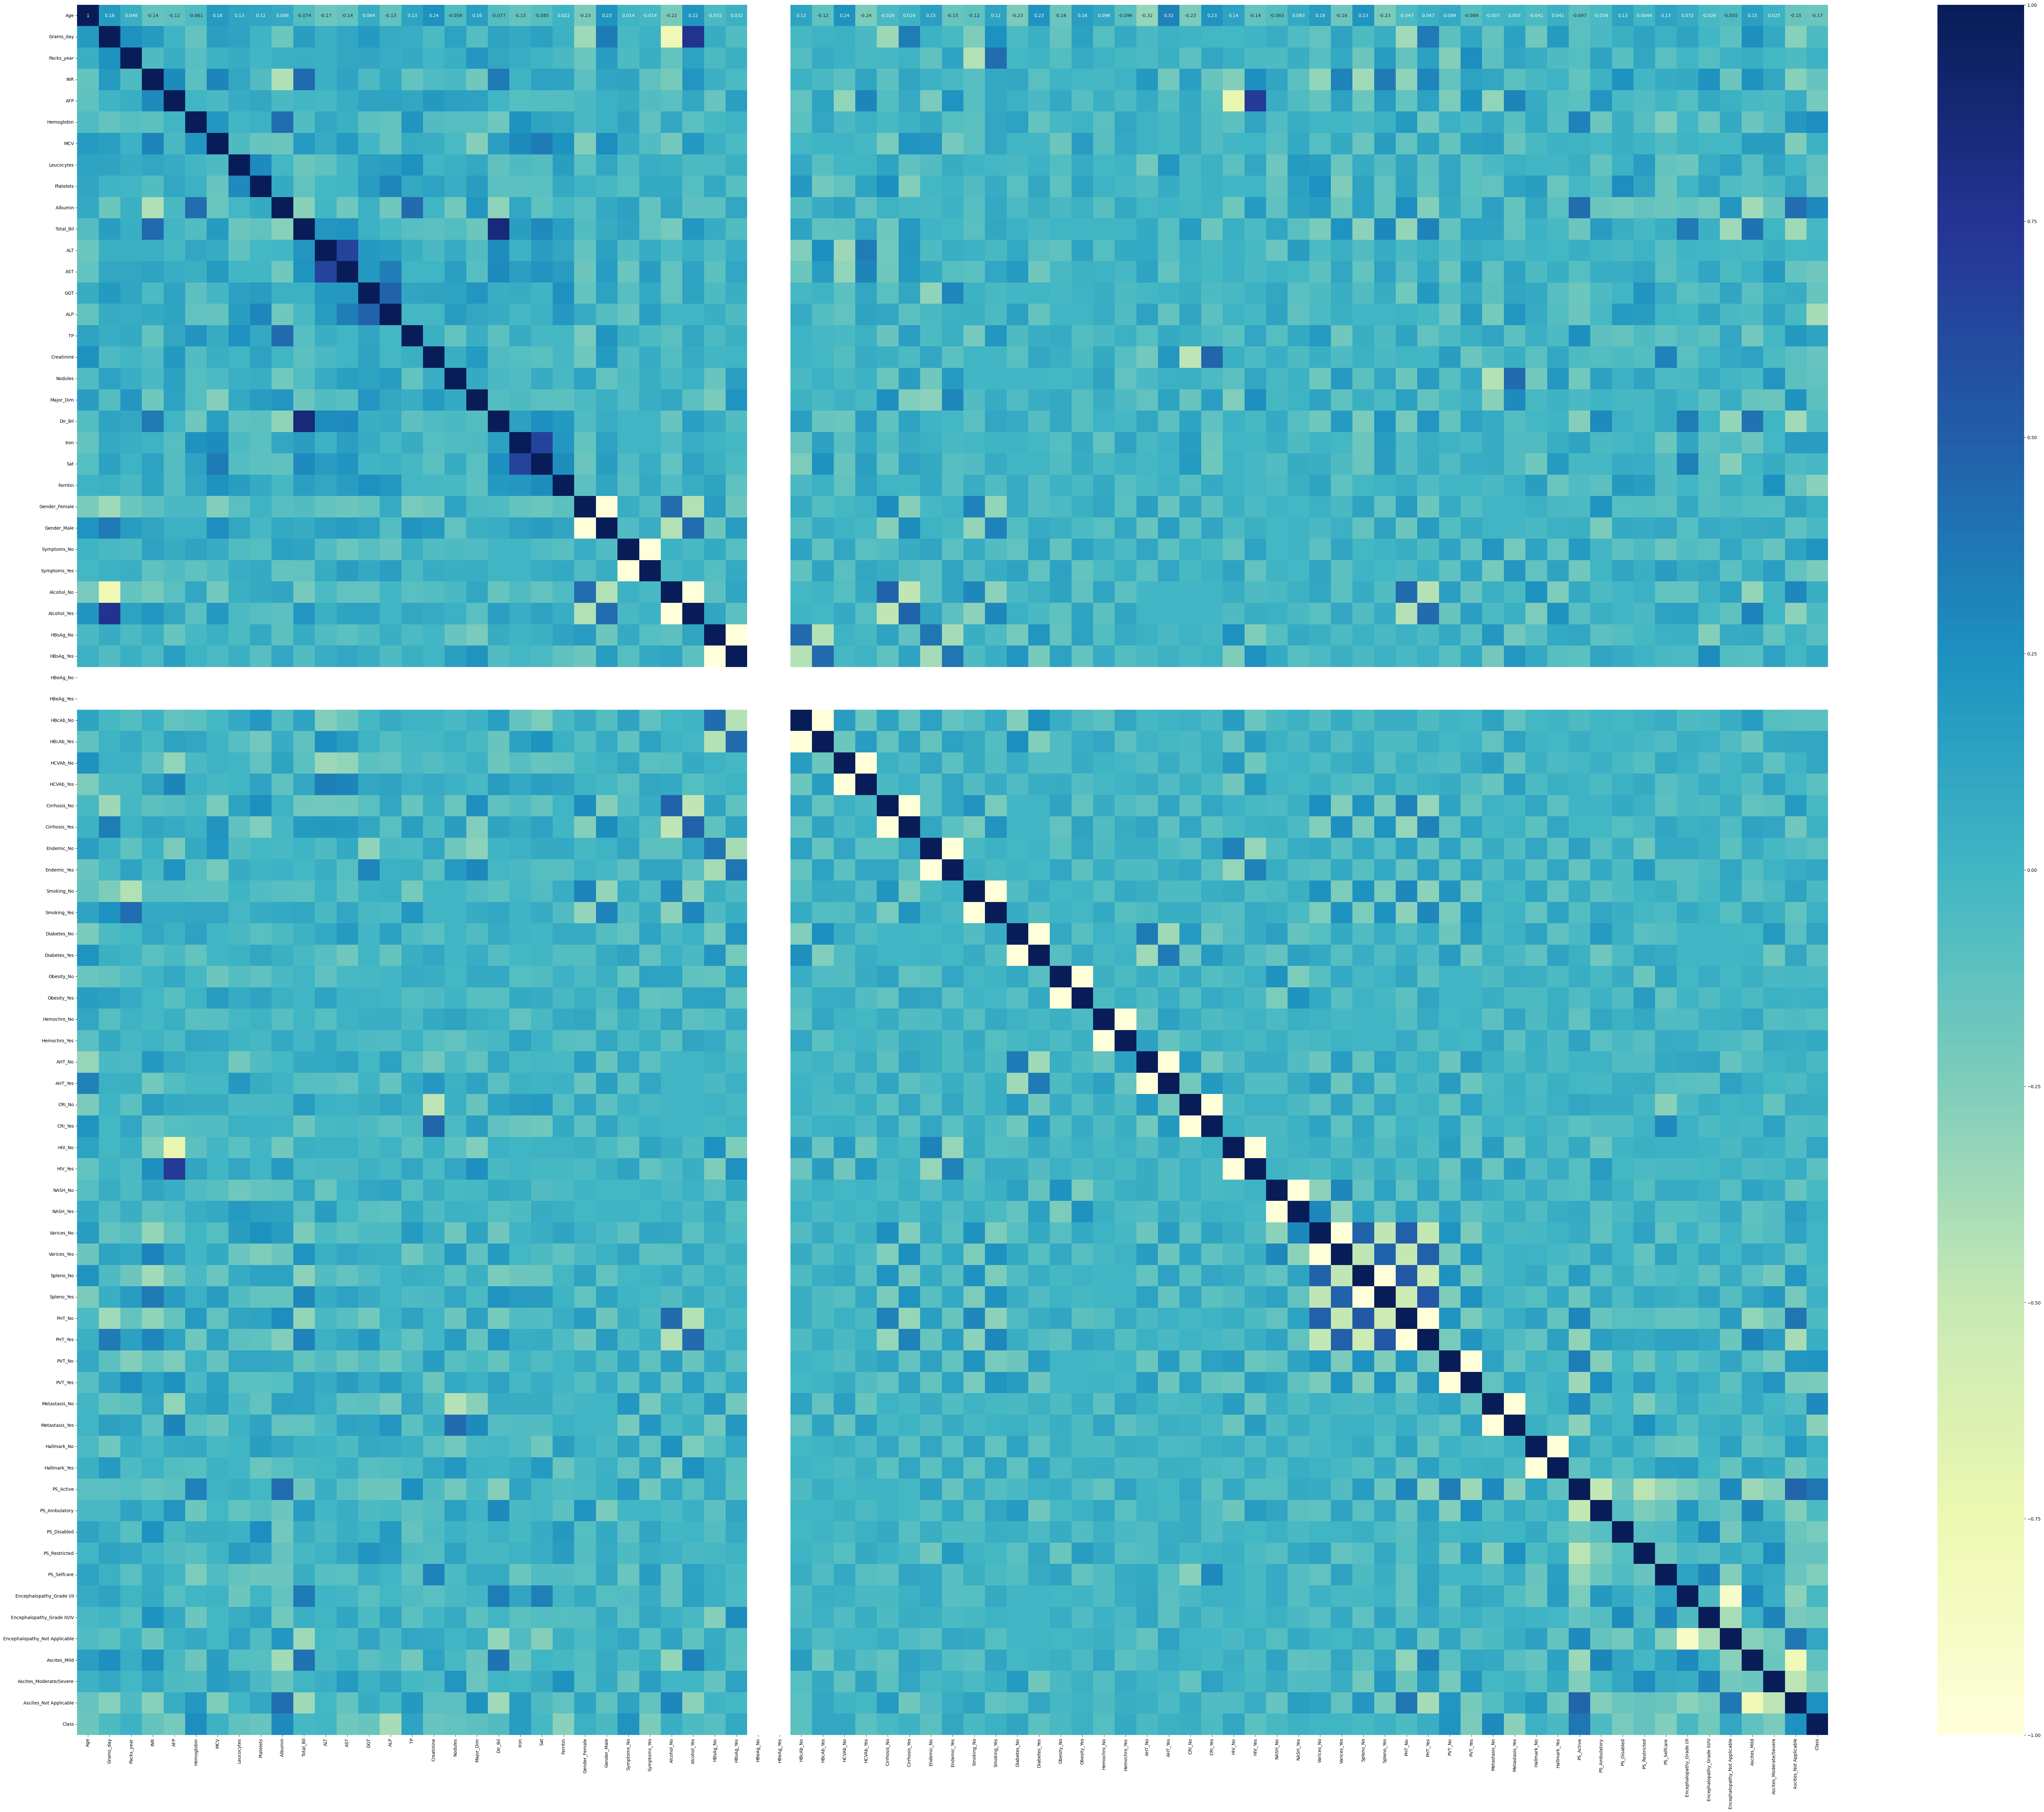

In [136]:
plt.figure(figsize=(88,70))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [137]:
# Criação de razão entre ALT e AST
train_data['ALT_AST_Ratio'] = train_data['ALT'] / train_data['AST']

In [138]:
train_data['Bilirubin_Ratio'] = train_data['Dir_Bil'] / train_data['Total_Bil']

In [139]:
train_data.drop(['Bilirubin_Diff'],axis=1,inplace=True)

KeyError: "['Bilirubin_Diff'] not found in axis"

In [ ]:
plt.figure(figsize=(88,70))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

### 7. Model training <a id='Model_training'></a>

[Back_to_top](#table_of_contents)

7.1. Decision tree <a id='Decision_tree'></a>

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [254]:
print(hcc_data.columns)

Index(['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Gender_Male', 'Symptoms_Yes', 'Alcohol_Yes',
       'HBsAg_Yes', 'HBeAg_Yes', 'HBcAb_Yes', 'HCVAb_Yes', 'Cirrhosis_Yes',
       'Endemic_Yes', 'Smoking_Yes', 'Diabetes_Yes', 'Obesity_Yes',
       'Hemochro_Yes', 'AHT_Yes', 'CRI_Yes', 'HIV_Yes', 'NASH_Yes',
       'Varices_Yes', 'Spleno_Yes', 'PHT_Yes', 'PVT_Yes', 'Metastasis_Yes',
       'Hallmark_Yes', 'PS_Ambulatory', 'PS_Disabled', 'PS_Restricted',
       'PS_Selfcare', 'Encephalopathy_Grade III/IV',
       'Encephalopathy_Not Applicable', 'Ascites_Moderate/Severe',
       'Ascites_Not Applicable', 'Class_Lives'],
      dtype='object')


In [255]:
X = hcc_data.drop('Class_Lives', axis=1)
y = hcc_data['Class_Lives']

In [256]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [257]:
X = pd.get_dummies(X, drop_first=True)


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [259]:
clf = DecisionTreeClassifier(max_depth=50)


In [260]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [261]:
y_pred = clf.predict(X_test)

In [268]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')


Acurácia: 0.58


In [269]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels = [0,1])

array([[12, 10],
       [11, 17]])

In [270]:
print(len(y_test))            # Verificar o tamanho de y_test
print(len(y_pred))     # Verificar o tamanho de y_pred_binary

50
50


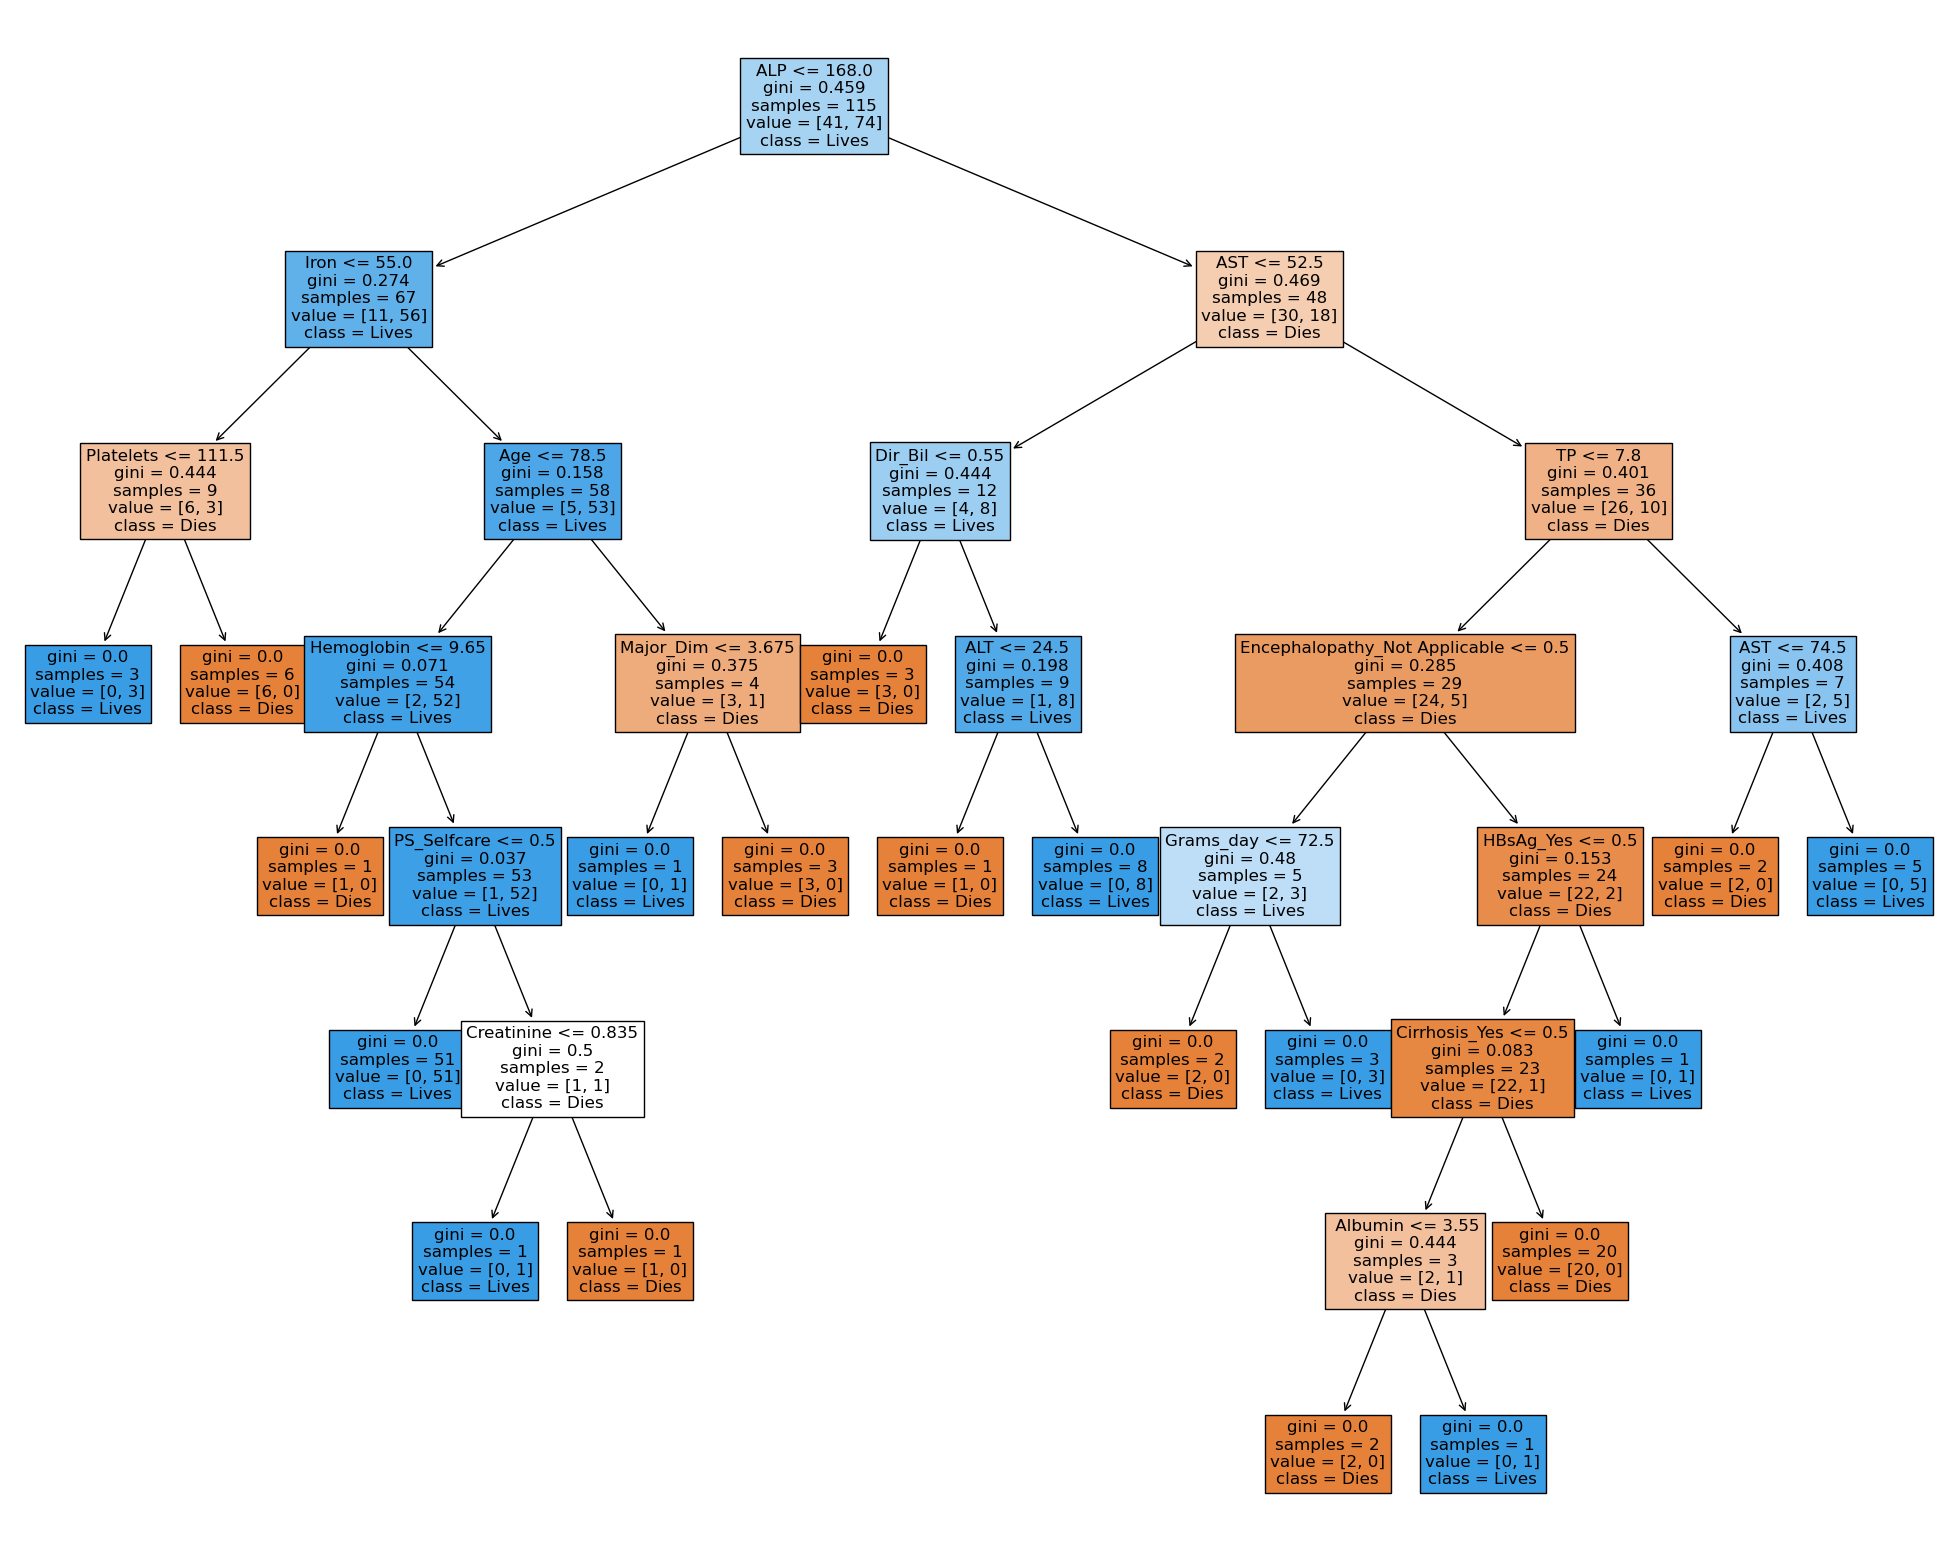

In [278]:
from sklearn import tree
from matplotlib import pyplot as plt

# Plotar a árvore de decisão
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0: 'Dies', 1: 'Lives'},
                   filled=True,
                   fontsize=12)
plt.show()

In [280]:
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões usando o classificador treinado (por exemplo, clf)
y_pred = clf.predict(X_test)

# Imprimir o relatório de classificação e a acurácia
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.59      0.55        22
           1       0.64      0.57      0.60        28

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.59      0.58      0.58        50

Accuracy: 0.58


In [271]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)
print(feature_importance)

                               importance
ALP                              0.258787
AST                              0.134167
Age                              0.117238
Iron                             0.099500
Dir_Bil                          0.086336
Platelets                        0.075808
TP                               0.062758
Encephalopathy_Not Applicable    0.041868
Hemoglobin                       0.035811
HBsAg_Yes                        0.033234
Ferritin                         0.025269
Sat                              0.018237
Cirrhosis_Yes                    0.010987
Hemochro_Yes                     0.000000
AHT_Yes                          0.000000
CRI_Yes                          0.000000
HIV_Yes                          0.000000
NASH_Yes                         0.000000
Varices_Yes                      0.000000
PVT_Yes                          0.000000
Spleno_Yes                       0.000000
PHT_Yes                          0.000000
Diabetes_Yes                     0

In [277]:
important_features = ['ALP', 'Iron', 'AST', 'Platelets', 'Age', 'TP', 'Encephalopathy_Not Applicable',
                      'Hemoglobin', 'Dir_Bil', 'HBsAg_Yes', 'Cirrhosis_Yes', 'Ferritin', 'Sat'] 


<Axes: >

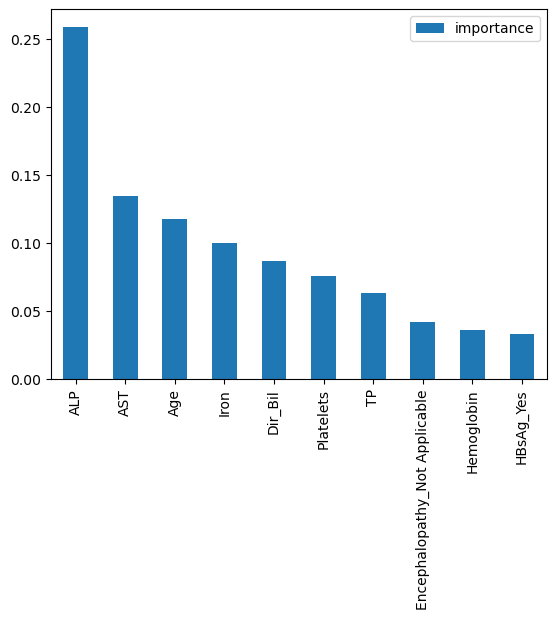

In [272]:
feature_importance.head(10).plot(kind='bar')

In [281]:
X2 = hcc_data[important_features]
y = hcc_data['Class_Lives']

In [ ]:
X2 = pd.get_dummies(X2, drop_first=True)

In [282]:
X2_train, X2_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [283]:
clf2 = DecisionTreeClassifier(max_depth=50)

In [285]:
clf2.fit(X2_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [286]:
y2_pred = clf.predict(X2_test)

In [288]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.58


In [289]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels = [0,1])

array([[13,  9],
       [12, 16]])

In [290]:
print(len(y_test))            
print(len(y_pred)) 

50
50


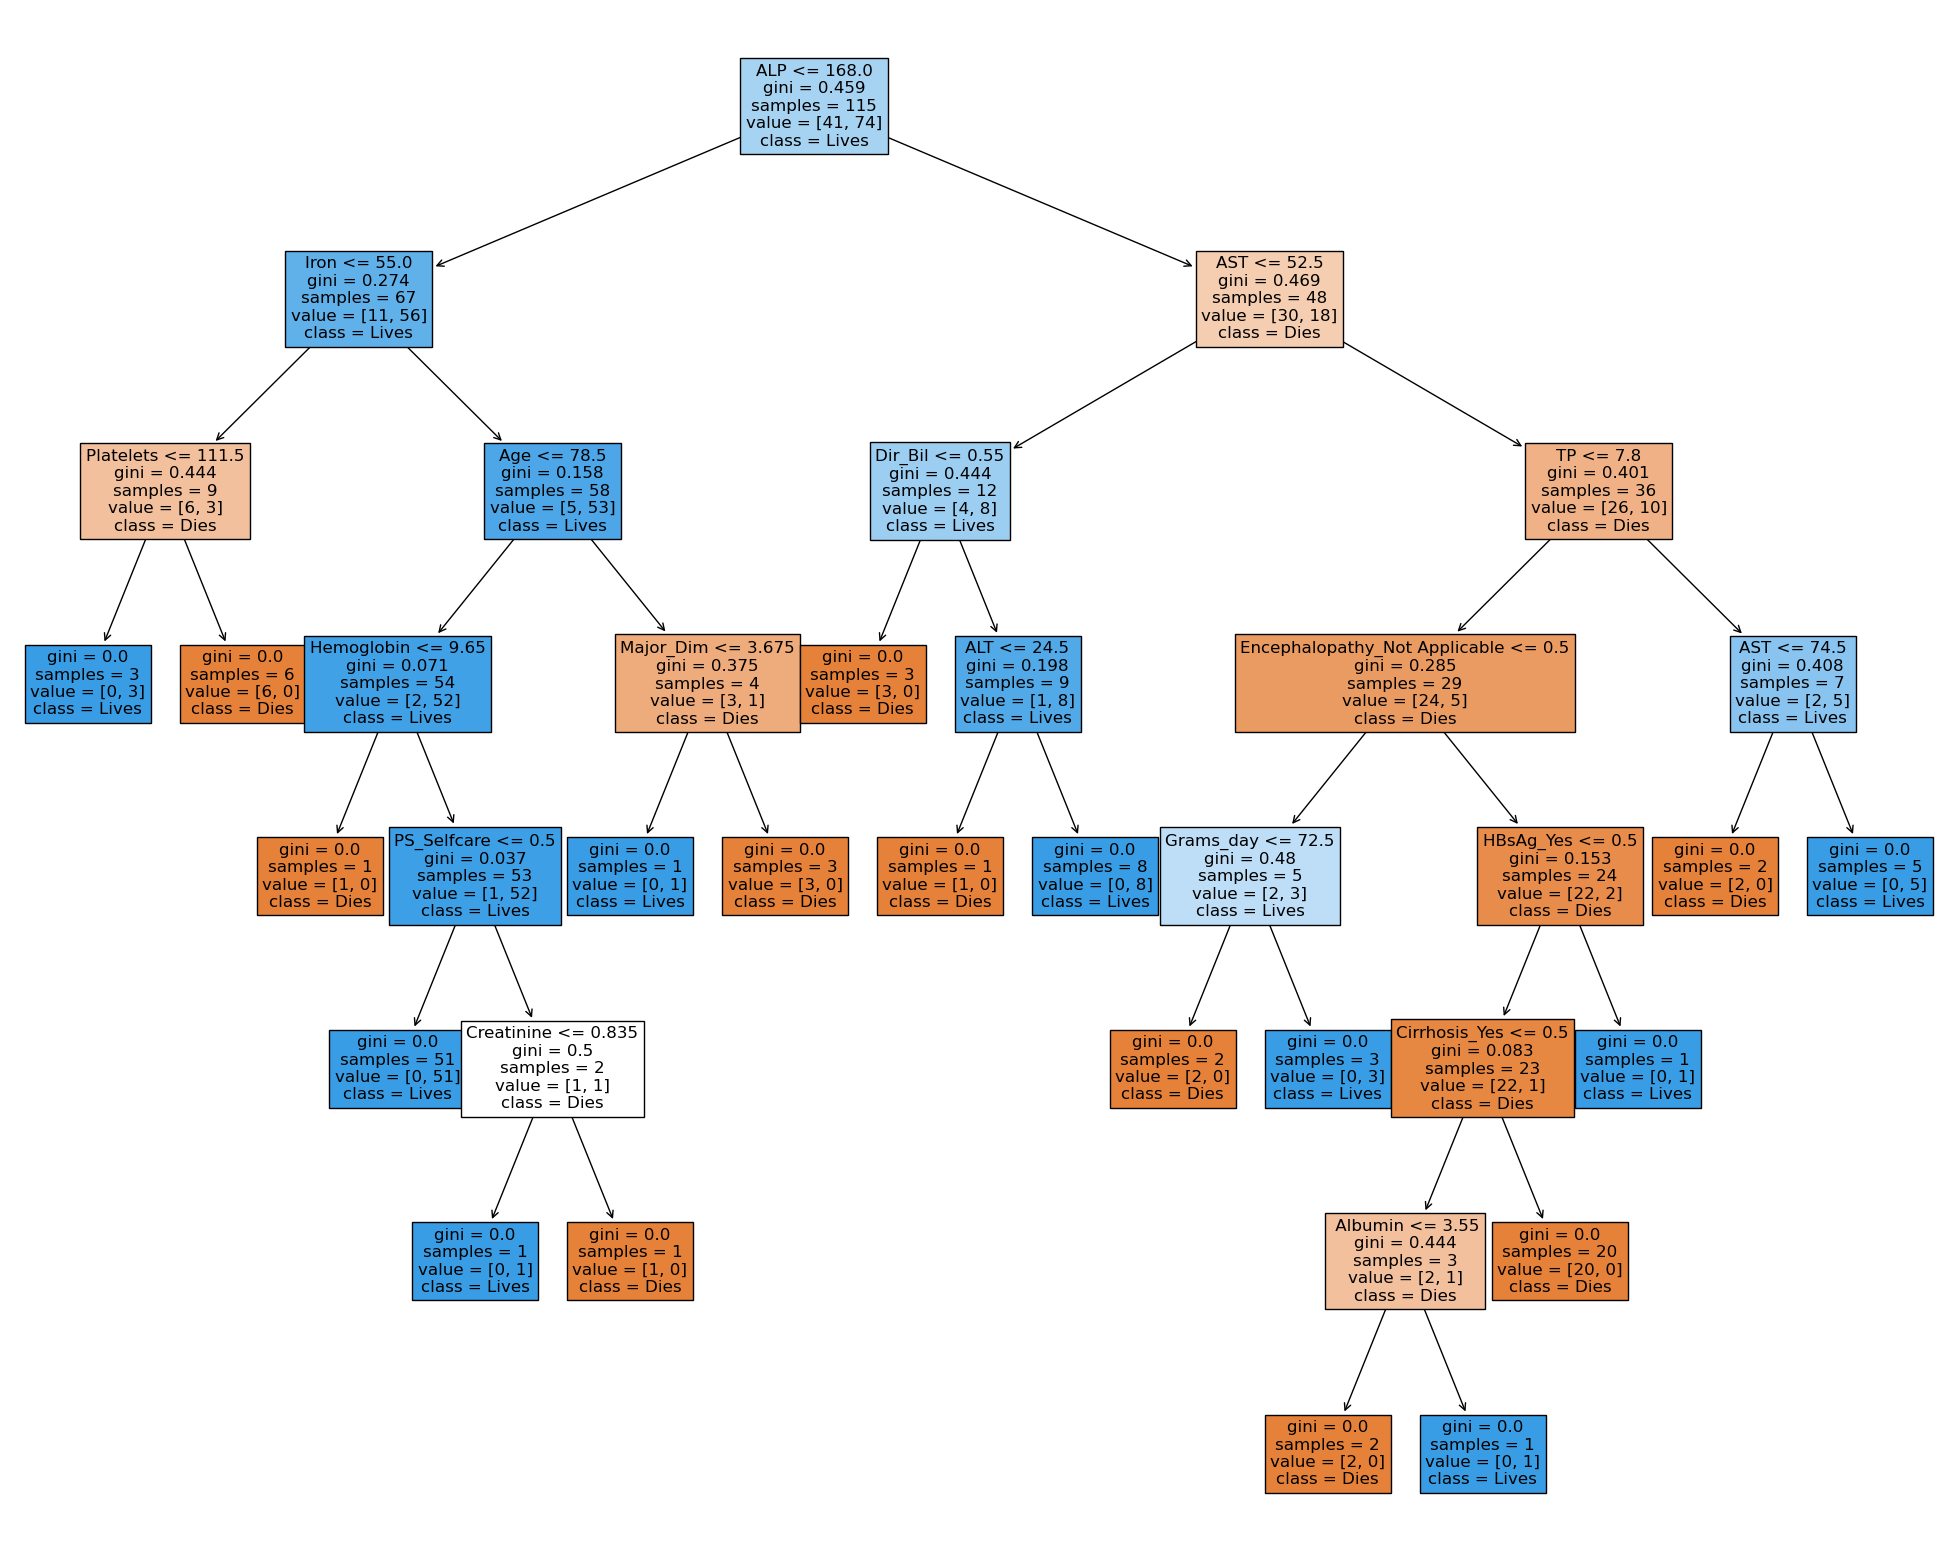

In [291]:
from sklearn import tree
from matplotlib import pyplot as plt

# Plotar a árvore de decisão
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0: 'Dies', 1: 'Lives'},
                   filled=True,
                   fontsize=12)
plt.show()

In [292]:
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões usando o classificador treinado (por exemplo, clf)
y_pred = clf.predict(X_test)

# Imprimir o relatório de classificação e a acurácia
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.52      0.59      0.55        22
        True       0.64      0.57      0.60        28

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.59      0.58      0.58        50

Accuracy: 0.58


##### 7.2. KNN   <a id='KNN'></a>

##### 7.3. Comparing Algorithm performance <a id='Comparing_algorithm_performance'></a>

### 8. Tuning <a id='Tuning'></a>
[Back_to_top](#table_of_contents)